In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import datetime as dt

In [5]:
crime=pd.read_csv("D:\MS\Project\PROJ_CAN\MCI_2014_to_2018.csv")

In [6]:
crime.head(5)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24T12:46:00.000Z,Commercial,1610,200,Robbery - Mugging,...,114.0,Thursday,11,Robbery,D55,68,North Riverdale (68),43.668449,-79.343094,1
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24T15:58:00.000Z,House,2120,200,B&E,...,114.0,Thursday,13,Break and Enter,D31,24,Black Creek (24),43.759285,-79.507927,2
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25T13:52:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,13,Assault,D12,30,Brookhaven-Amesbury (30),43.697552,-79.501663,3
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25T10:30:00.000Z,Outside,1430,100,Assault,...,114.0,Thursday,17,Assault,D23,4,Rexdale-Kipling (4),43.721703,-79.571510,4
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25T16:15:00.000Z,Apartment,1430,100,Assault,...,115.0,Friday,16,Assault,D11,114,Lambton Baby Point (114),43.663891,-79.503487,5


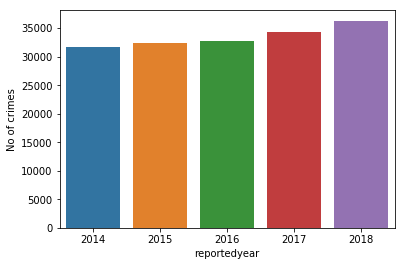

In [7]:
sns.countplot(x='reportedyear',data=crime) #CRIMES EACH YEAR
plt.ylabel('No of crimes')
plt.show()

In [8]:
from datetime import datetime

In [9]:
#Convert date in the data set to an interpretative format that python can understand.
crime['reporteddate'] = pd.to_datetime(crime['reporteddate'],format='%Y-%m-%dT%H:%M:%S.%fZ')

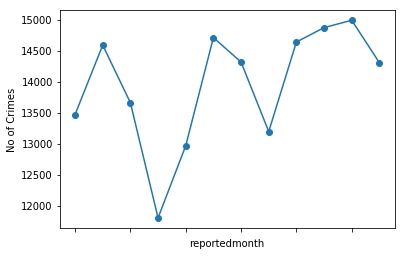

In [10]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crime.groupby('reportedmonth')['event_unique_id'].count().plot(marker='o')

plt.ylabel('No of Crimes')
plt.show()

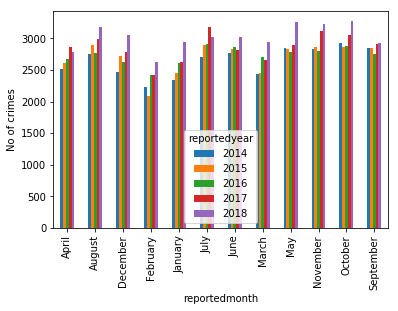

In [11]:
crime.groupby(['reportedmonth','reportedyear'])['event_unique_id'].count().unstack().plot(kind='bar')

plt.ylabel('No of crimes')
plt.show()

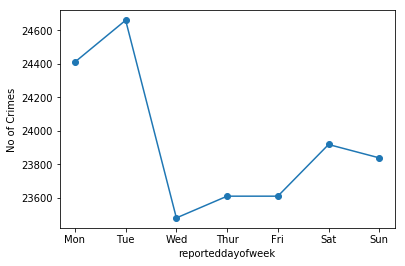

In [12]:
crime.groupby('reporteddayofweek')['event_unique_id'].count().plot(marker='o',label='Crimes')
week=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
plt.ylabel('No of Crimes')
plt.xticks(np.arange(7),week)
plt.show()

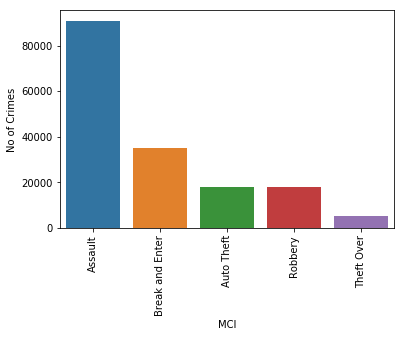

In [13]:
sns.countplot(x='MCI',data=crime,order=crime['MCI'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [14]:
temp=crime.groupby('premisetype')['ObjectId'].count().sort_values(ascending=False)
temp

premisetype
Outside       44495
Apartment     40589
Commercial    32542
House         31271
Other         18628
Name: ObjectId, dtype: int64

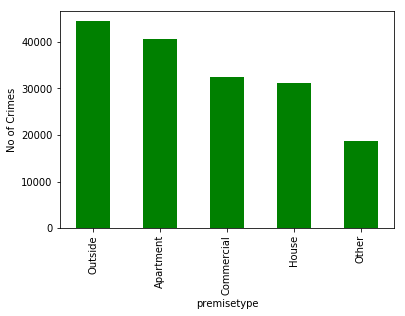

In [15]:
#Number of crimes in each location
temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

In [16]:
crime.groupby('MCI')['ObjectId'].count().sort_values(ascending=False)
top_crime=crime[(crime['MCI']=='Assault')|(crime['MCI']=='Break and Enter')|(crime['MCI']=='Auto Theft')|(crime['MCI']=='Robbery')|(crime['MCI']=='Theft Over')]
top_crime

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.343094,43.668449,214,GO-20141948968,2014-04-24T11:29:00.000Z,2014-04-24 12:46:00,Commercial,1610,200,Robbery - Mugging,...,114.0,Thursday,11,Robbery,D55,68,North Riverdale (68),43.668449,-79.343094,1
1,-79.507927,43.759285,215,GO-20141950728,2014-04-24T13:00:00.000Z,2014-04-24 15:58:00,House,2120,200,B&E,...,114.0,Thursday,13,Break and Enter,D31,24,Black Creek (24),43.759285,-79.507927,2
2,-79.501663,43.697552,216,GO-20141956416,2014-04-25T13:20:00.000Z,2014-04-25 13:52:00,Apartment,1430,100,Assault,...,115.0,Friday,13,Assault,D12,30,Brookhaven-Amesbury (30),43.697552,-79.501663,3
3,-79.571510,43.721703,217,GO-20141956867,2014-04-24T17:00:00.000Z,2014-04-25 10:30:00,Outside,1430,100,Assault,...,114.0,Thursday,17,Assault,D23,4,Rexdale-Kipling (4),43.721703,-79.571510,4
4,-79.503487,43.663891,218,GO-20141957505,2014-04-25T16:00:00.000Z,2014-04-25 16:15:00,Apartment,1430,100,Assault,...,115.0,Friday,16,Assault,D11,114,Lambton Baby Point (114),43.663891,-79.503487,5
5,-79.373459,43.657307,219,GO-20141959512,2014-04-25T22:30:00.000Z,2014-04-25 22:42:00,Apartment,1430,100,Assault,...,115.0,Friday,22,Assault,D51,73,Moss Park (73),43.657307,-79.373459,6
6,-79.316605,43.666363,220,GO-20142004614,2014-05-03T01:46:00.000Z,2014-05-03 03:42:00,Outside,1430,100,Assault,...,123.0,Saturday,1,Assault,D55,64,Woodbine Corridor (64),43.666363,-79.316605,7
7,-79.402023,43.658112,221,GO-20142005151,2014-05-03T04:44:00.000Z,2014-05-03 04:44:00,Outside,1420,100,Assault With Weapon,...,123.0,Saturday,4,Assault,D14,79,University (79),43.658112,-79.402023,8
8,-79.402023,43.658112,222,GO-20142005151,2014-05-03T04:44:00.000Z,2014-05-03 04:44:00,Outside,1420,100,Assault With Weapon,...,123.0,Saturday,4,Assault,D14,79,University (79),43.658112,-79.402023,9
9,-79.402023,43.658112,223,GO-20142005151,2014-05-03T04:44:00.000Z,2014-05-03 04:44:00,Outside,1420,100,Assault With Weapon,...,123.0,Saturday,4,Assault,D14,79,University (79),43.658112,-79.402023,10


In [17]:
temp=top_crime.pivot_table(values='ObjectId', index='reportedmonth', columns='reportedyear', aggfunc=np.size)

In [18]:
temp

reportedyear,2014,2015,2016,2017,2018
reportedmonth,,,,,
April,2524,2619,2675,2869,2782
August,2751,2899,2767,2992,3181
December,2477,2715,2631,2779,3060
February,2238,2084,2427,2425,2630
January,2344,2450,2606,2624,2943
July,2703,2893,2906,3178,3031
June,2768,2833,2867,2824,3025
March,2432,2452,2713,2656,2943
May,2856,2832,2791,2895,3266


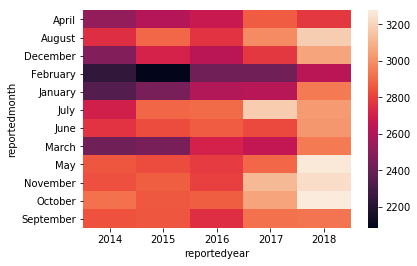

In [19]:
sns.heatmap(temp)

plt.show()

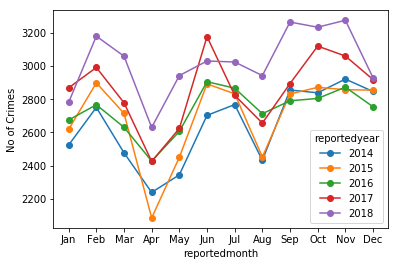

In [20]:
top_crime.groupby(['reportedmonth','reportedyear'])['ObjectId'].count().unstack().plot(marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

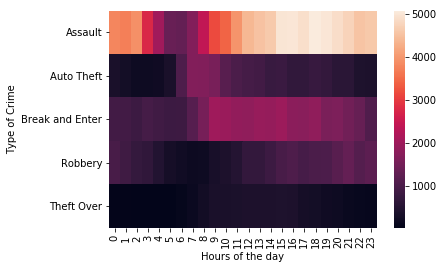

In [21]:
temp= top_crime.pivot_table(values='ObjectId', index='MCI',columns=top_crime['reporteddate'].dt.hour, aggfunc=np.size)
sns.heatmap(temp)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

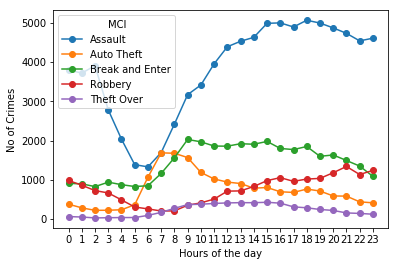

In [22]:
top_crime.groupby([top_crime['reporteddate'].dt.hour,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Hours of the day')
plt.xticks(np.arange(24))
plt.show()

In [23]:
temp= top_crime.pivot_table(values='ObjectId', index='MCI', columns='reportedmonth', aggfunc=np.size)
temp

reportedmonth,April,August,December,February,January,July,June,March,May,November,October,September
MCI,,,,,,,,,,,,
Assault,7464,7857,7296,6431,6938,8122,8002,7126,8292,7818,7761,7771
Auto Theft,1387,1652,1524,1209,1246,1643,1478,1450,1479,1742,1781,1587
Break and Enter,2749,3083,2986,2517,2913,2863,2863,2749,2793,3206,3238,2951
Robbery,1439,1504,1399,1298,1470,1611,1530,1450,1580,1616,1725,1506
Theft Over,430,494,457,349,400,472,444,421,496,490,486,491


In [24]:
crime_assault=crime[(crime['MCI']=='Assault')]

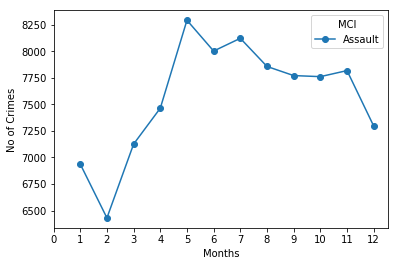

In [25]:
crime_assault.groupby([crime_assault['reporteddate'].dt.month,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Months')
plt.xticks(np.arange(13))
plt.show()

In [26]:
crime_be=crime[(crime['MCI']=='Break and Enter')]

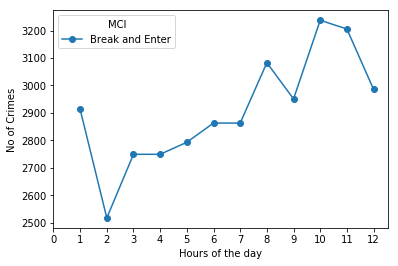

In [27]:
crime_be.groupby([crime_be['reporteddate'].dt.month,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Hours of the day')
plt.xticks(np.arange(13))
plt.show()

In [28]:
crime_rob=crime[(crime['MCI']=='Robbery')]

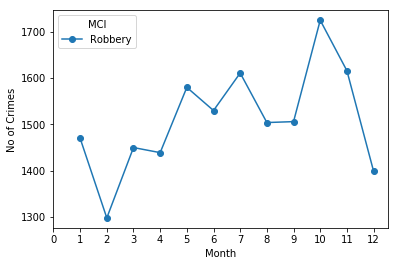

In [29]:
crime_rob.groupby([crime_rob['reporteddate'].dt.month,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Month')
plt.xticks(np.arange(13))
plt.show()

In [30]:
crime_auto=crime[(crime['MCI']=='Auto Theft')]

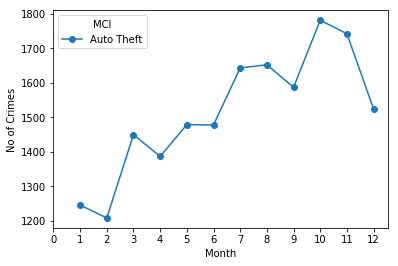

In [31]:
crime_auto.groupby([crime_auto['reporteddate'].dt.month,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Month')
plt.xticks(np.arange(13))
plt.show()

In [32]:
crime_theftover=crime[(crime['MCI']=='Theft Over')]

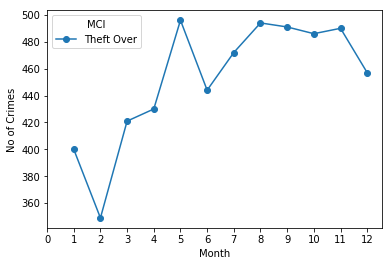

In [33]:
crime_theftover.groupby([crime_theftover['reporteddate'].dt.month,'MCI',])['ObjectId'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Month')
plt.xticks(np.arange(13))
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
cols = ['occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

In [40]:
top_crime = top_crime[cols]
top_crime = top_crime[top_crime['occurrenceyear'] > 2013]

In [41]:
crime_fact = pd.factorize(top_crime['MCI'])
top_crime['MCI'] = crime_fact[0]
MCI_list = crime_fact[1]

In [42]:
premise_fact = pd.factorize(top_crime['premisetype'])
top_crime['premisetype'] = premise_fact[0]
premise_list = premise_fact[1] 

In [43]:
year_fact = pd.factorize(top_crime['occurrenceyear'])
top_crime['occurrenceyear'] = year_fact[0]
year_list = year_fact[1]

In [44]:
month_fact = pd.factorize(top_crime['occurrencemonth'])
top_crime['occurrencemonth'] = month_fact[0]
month_list = month_fact[1] 

In [45]:
day_fact = pd.factorize(top_crime['occurrenceday'])
top_crime['occurenceday'] = day_fact[0]
day_list = day_fact[1] 

In [46]:
week_fact = pd.factorize(top_crime['occurrencedayofweek'])
top_crime['occurrencedayofweek'] = week_fact[0]
week_list = week_fact[1] 

In [47]:
division_fact = pd.factorize(top_crime['Division'])
top_crime['Division'] = division_fact[0]
division_list = division_fact[1] 



hood_fact = pd.factorize(top_crime['Hood_ID'])
top_crime['Hood_ID'] = hood_fact[0]
hood_list = hood_fact[1] 


hour_fact = pd.factorize(top_crime['occurrencehour'])
top_crime['occurrencehour'] = hour_fact[0]
hour_list = hour_fact[1] 



dayyear_fact = pd.factorize(top_crime['occurrencedayofyear'])
top_crime['occurrencedayofyear'] = dayyear_fact[0]
dayyear_list = dayyear_fact[1] 

In [48]:
X = top_crime.drop(['MCI'],axis=1).values

In [49]:
y = top_crime['MCI'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [51]:
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)

In [52]:
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

In [53]:
classifier = RandomForestClassifier(n_estimators = 100)


In [ ]:
classifier.fit(X_train_OH, y_train_OH)

In [55]:
y_pred_rfc = classifier.predict(X_test_OH)

In [56]:
print(confusion_matrix(y_test_OH, y_pred_rfc))

[[ 1503   210  2608    10   240]
 [   33  4230  4280    28   160]
 [  497  1583 19884    27   509]
 [   33   268   907    24    84]
 [  130   508  2340    14  1515]]


In [57]:
print(classification_report(y_test_OH,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.68      0.33      0.44      4571
           1       0.62      0.48      0.54      8731
           2       0.66      0.88      0.76     22500
           3       0.23      0.02      0.03      1316
           4       0.60      0.34      0.43      4507

   micro avg       0.65      0.65      0.65     41625
   macro avg       0.56      0.41      0.44     41625
weighted avg       0.64      0.65      0.62     41625



In [58]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_OH, y_pred_OH))

NameError: name 'y_pred_OH' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train_OH, y_train_OH)

In [ ]:
pred = dtree.predict(X_test_OH)

In [ ]:
print(confusion_matrix(y_test_OH, pred))

In [ ]:
print(classification_report(y_test_OH,pred))

In [ ]:
print(accuracy_score(y_test_OH, pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)

In [ ]:
top_crime_sel=top_crime[:100000]

In [ ]:
X = top_crime_sel.drop(['MCI'],axis=1).values

In [ ]:
y = top_crime_sel['MCI'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)


In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred_knn=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred_knn))

In [ ]:
print(confusion_matrix(y_test,pred_knn))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))

In [ ]:
import folium

In [ ]:
crime_map = folium.Map(location=[43.6684494, -79.3430939],zoom_start=11)

In [ ]:
c_map = crime.groupby('Division').first().loc[:, ['Lat', 'Long', 'Neighbourhood']]

In [ ]:
for i in range(len(c_map)):
    lat = c_map.iloc[i][0]
    long = c_map.iloc[i][1]
    popup_text = """Division : {}<br>
                Neighborhood : {}<br>
                """
    popup_text = popup_text.format(c_map.index[i],c_map.iloc[i][-1],c_map.iloc[i][-2])
    folium.CircleMarker(location = [lat, long], popup= popup_text).add_to(crime_map)

In [ ]:
crime_map

In [ ]:
c_map_mci = crime.groupby('Neighbourhood').first().loc[:, ['Lat', 'Long', 'MCI']]

In [ ]:
for i in range(len(c_map_mci)):
    lat = c_map_mci.iloc[i][0]
    long = c_map_mci.iloc[i][1]
    popup_text = """Neighbourhood : {}<br>
                 MCI: {}<br>
                """
    popup_text = popup_text.format(c_map_mci.index[i],c_map_mci.iloc[i][-1],c_map_mci.iloc[i][-2])
    folium.CircleMarker(location = [lat, long], popup= popup_text).add_to(crime_map)

In [ ]:
crime_map

In [64]:
temp1=crime.groupby('Neighbourhood')['ObjectId'].count().sort_values(ascending=False)


Neighbourhood
Church-Yonge Corridor (75)                  6301
Waterfront Communities-The Island (77)      5674
West Humber-Clairville (1)                  4338
Moss Park (73)                              3609
Bay Street Corridor (76)                    3564
Kensington-Chinatown (78)                   3263
Woburn (137)                                3158
York University Heights (27)                3141
Downsview-Roding-CFB (26)                   2974
Annex (95)                                  2908
West Hill (136)                             2857
Islington-City Centre West (14)             2589
Dovercourt-Wallace Emerson-Junction (93)    2450
Wexford/Maryvale (119)                      2350
Bendale (127)                               2277
Mount Olive-Silverstone-Jamestown (2)       2257
Clairlea-Birchmount (120)                   2163
Mimico (includes Humber Bay Shores) (17)    2040
Malvern (132)                               2024
Black Creek (24)                            2006
Glenfi